In [42]:
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

In [10]:
dinos = pd.read_csv("../data/dinosaurs.csv", names=['name'])

In [13]:
Names = dinos.name

In [14]:
NamesSep = Names.map(lambda x: list(x))
NamesSep.head()

0    [a, a, c, h, e, n, o, s, a, u, r, u, s]
1                   [a, a, r, d, o, n, y, x]
2          [a, b, e, l, i, s, a, u, r, u, s]
3    [a, b, r, i, c, t, o, s, a, u, r, u, s]
4             [a, b, r, o, s, a, u, r, u, s]
Name: name, dtype: object

In [15]:
NamesSepWithStartStop = NamesSep.map(lambda x: x+['#'])
NamesSepWithStartStop.head()

0    [a, a, c, h, e, n, o, s, a, u, r, u, s, #]
1                   [a, a, r, d, o, n, y, x, #]
2          [a, b, e, l, i, s, a, u, r, u, s, #]
3    [a, b, r, i, c, t, o, s, a, u, r, u, s, #]
4             [a, b, r, o, s, a, u, r, u, s, #]
Name: name, dtype: object

In [48]:
AllNames = pd.concat([NamesSepWithStartStop,NamesSepWithStartStop.map(lambda x: len(x))],axis=1)
AllNames.columns = ['Name','Length']
AllNames.head()

,Name,Length
0,"[a, a, c, h, e, n, o, s, a, u, r, u, s, #]",14
1,"[a, a, r, d, o, n, y, x, #]",9
2,"[a, b, e, l, i, s, a, u, r, u, s, #]",12
3,"[a, b, r, i, c, t, o, s, a, u, r, u, s, #]",14
4,"[a, b, r, o, s, a, u, r, u, s, #]",11


In [17]:
AllNames.describe()

,Length
count,1325.000000
mean,12.800755
std,2.455249
min,4.000000
25%,11.000000
50%,13.000000
75%,14.000000
max,24.000000


In [18]:
TempNames = list(AllNames.Name)

In [19]:
allChars = [char for name in TempNames for char in name]

In [20]:
chars = list(set(allChars))
chars

['d',
 'v',
 'j',
 'q',
 's',
 'm',
 'c',
 'r',
 'y',
 'u',
 'x',
 'k',
 'z',
 'w',
 'b',
 't',
 'n',
 'o',
 'p',
 'h',
 'l',
 'a',
 '#',
 'e',
 'f',
 'g',
 'i']

In [21]:
char_to_token = dict(zip(chars,[num for num in range(len(chars))]))
char_to_token

{'d': 0,
 'v': 1,
 'j': 2,
 'q': 3,
 's': 4,
 'm': 5,
 'c': 6,
 'r': 7,
 'y': 8,
 'u': 9,
 'x': 10,
 'k': 11,
 'z': 12,
 'w': 13,
 'b': 14,
 't': 15,
 'n': 16,
 'o': 17,
 'p': 18,
 'h': 19,
 'l': 20,
 'a': 21,
 '#': 22,
 'e': 23,
 'f': 24,
 'g': 25,
 'i': 26}

In [22]:
max_token = max(list(char_to_token.values()))
print(max_token)
token_to_encode = dict()
for i in char_to_token.values():
    temp = np.zeros((1,max_token+1))
    temp[:,i] = 1
    token_to_encode[i] = temp

token_to_encode

26


{0: array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 1: array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 2: array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 3: array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 4: array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 5: array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 6: array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 7: array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,


In [24]:
def tokenEncoder(tokens):
    encoded = np.empty((len(tokens),max_token+1))
    for i in range(len(tokens)):
        encoded[i,:] = token_to_encode[tokens[i]]
    return encoded

In [26]:
token_to_char = {value: key for key, value in char_to_token.items() }
token_to_char

{0: 'd',
 1: 'v',
 2: 'j',
 3: 'q',
 4: 's',
 5: 'm',
 6: 'c',
 7: 'r',
 8: 'y',
 9: 'u',
 10: 'x',
 11: 'k',
 12: 'z',
 13: 'w',
 14: 'b',
 15: 't',
 16: 'n',
 17: 'o',
 18: 'p',
 19: 'h',
 20: 'l',
 21: 'a',
 22: '#',
 23: 'e',
 24: 'f',
 25: 'g',
 26: 'i'}

In [27]:
def encodingCharacterizer(encoding):
    characters = list()
    for i in range(len(encoding)):
        characters.append(token_to_char[encoding[i].argmax()])
    return characters

In [29]:
dtype = torch.FloatTensor
input_size, hidden_size, output_size = max_token+1+max_token+1, max_token+1, max_token+1

In [30]:
w1 = torch.FloatTensor(np.random.randn(input_size, hidden_size)).type(dtype)
w1 =  Variable(w1, requires_grad=True)
w2 = torch.FloatTensor(np.random.randn(hidden_size, output_size)).type(dtype)
w2 = Variable(w2, requires_grad=True)
b1 = torch.FloatTensor(np.random.randn(1, hidden_size)).type(dtype)
b1 =  Variable(b1, requires_grad=True)
b2 = torch.FloatTensor(np.random.randn(1, output_size)).type(dtype)
b2 = Variable(b2, requires_grad=True)
w3 = torch.FloatTensor(np.random.randn(output_size, output_size)).type(dtype)
w3 = Variable(w3, requires_grad=True)
b3 = torch.FloatTensor(np.random.randn(1, output_size)).type(dtype)
b3 = Variable(b3, requires_grad=True)

In [49]:
TestTensor = torch.FloatTensor(tokenEncoder(charTokenizer(AllNames.Name[2])))
TestTensor.size()

torch.Size([12, 27])

In [32]:
def cycle(hidden,inputs):
    h_t = torch.tanh(torch.mm(torch.cat([inputs,hidden],dim=1),w1)+b1)
    out = torch.mm(torch.tanh(torch.mm(h_t,w2)+b2),w3)+b3
    return h_t, out
    
def forward(X,init=None):
    lenSeq = X.size(0)
    hiddens = []
    outs = []
    if init==None:
        h_t=torch.zeros(1,X.size(1))
    else:
        h_t = init
    for i in range(lenSeq):
        h_t,out = cycle(h_t,X[[i]])
        hiddens.append(h_t)
        outs.append(out)
    hiddenSeq = torch.cat(hiddens)
    outSeq = torch.cat(outs)
    return hiddenSeq,outSeq

In [33]:
optimizer = torch.optim.Adam([w1,w2,w3,b1,b2,b3], lr = 0.001)

def backward(OutputSequence,TrueLabels):
    _, targets = TrueLabels.max(dim=1)
    #print(targets)
    loss = torch.nn.CrossEntropyLoss()(OutputSequence,targets)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    #print(loss.data)
    return loss

In [34]:
hid,out = forward(TestTensor[0:-1])
backward(out,TestTensor[1:])

tensor(10.6422, grad_fn=<NllLossBackward>)

In [35]:
Names = AllNames.Name

In [36]:
EncodedNames = Names.apply(lambda x: tokenEncoder(charTokenizer(x)))

In [37]:
np.array(EncodedNames.sample().tolist()[0]).shape

(10, 27)

Epochs: 2000/200000
Epochs: 4000/200000
Epochs: 6000/200000
Epochs: 8000/200000
Epochs: 10000/200000
Epochs: 12000/200000
Epochs: 14000/200000
Epochs: 16000/200000
Epochs: 18000/200000
Epochs: 20000/200000
Epochs: 22000/200000
Epochs: 24000/200000
Epochs: 26000/200000
Epochs: 28000/200000
Epochs: 30000/200000
Epochs: 32000/200000
Epochs: 34000/200000
Epochs: 36000/200000
Epochs: 38000/200000
Epochs: 40000/200000
Epochs: 42000/200000
Epochs: 44000/200000
Epochs: 46000/200000
Epochs: 48000/200000
Epochs: 50000/200000
Epochs: 52000/200000
Epochs: 54000/200000
Epochs: 56000/200000
Epochs: 58000/200000
Epochs: 60000/200000
Epochs: 62000/200000
Epochs: 64000/200000
Epochs: 66000/200000
Epochs: 68000/200000
Epochs: 70000/200000
Epochs: 72000/200000
Epochs: 74000/200000
Epochs: 76000/200000
Epochs: 78000/200000
Epochs: 80000/200000
Epochs: 82000/200000
Epochs: 84000/200000
Epochs: 86000/200000
Epochs: 88000/200000
Epochs: 90000/200000
Epochs: 92000/200000
Epochs: 94000/200000
Epochs: 96000/200

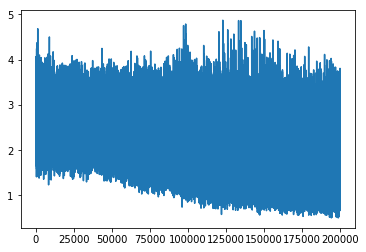

In [43]:
optimizer = torch.optim.Adam([w1,w2,w3,b1,b2,b3], lr = 0.001)
epochs = 200000
losses = []
for i in tqdm(range(epochs)):
    Sample = np.array(EncodedNames.sample().tolist()[0])
    X = torch.FloatTensor(Sample)
    hid,out = forward(X[0:-1])
    lossVal = backward(out,X[1:])
    losses.append(lossVal)
    
plt.plot(losses)

In [44]:
def generate(startLetter=None,sillyFactor=0.25):
    # if no start letter provided, pick one at random
    if startLetter==None:
        startLetter=token_to_char[round(np.random.rand()*max_token)]
    if startLetter=='#':
        return None
    generated = [startLetter]
    start = torch.FloatTensor(tokenEncoder(charTokenizer([startLetter])))
    h_t = torch.randn(1,hidden_size)*sillyFactor
    h_t,out = cycle(h_t,start)
    out = torch.softmax(out,dim=1)
    ## from one hot encoded output, back to the character
    _, pos = out.max(dim=1)
    out = torch.zeros(1,hidden_size)
    out[:,pos]=1
    # if the generated character is the stop token, return None
    if token_to_char[int(pos)] == '#':
        return None
    generated.append(token_to_char[int(pos)])
    # do a for loop and get an output until a stop token or 
    # max number of iterations
    for i in range(24):
        h_t,out = cycle(h_t,out)
        out = torch.softmax(out,dim=1)
        _, pos = out.max(dim=1)
        out = torch.zeros(1,hidden_size)
        out[:,pos]=1
        if token_to_char[int(pos)] == '#':
            break
        generated.append(token_to_char[int(pos)])
    #print(''.join(generated))
    return ''.join(generated)

In [45]:
nonSense = [generate(startLetter=None,sillyFactor=np.random.rand()) for i in range(100)]

In [46]:
nonSense

['gos',
 'tanonnosaurus',
 'luronosaurus',
 'randaurus',
 'lurhosaurus',
 'enonrus',
 'irauraurus',
 'uriosaurus',
 'gaa',
 'silosaurus',
 'lnna',
 'buulocosaurus',
 'kaaruraeeonosaurus',
 'auras',
 'zinaakaurus',
 'uaos',
 'guraprus',
 'gaanonopaurus',
 'yreuraluteaosaurus',
 'jinanosaurus',
 'dianosaurus',
 'rhoso',
 'aulosaurus',
 'genrosaurus',
 'lumonosaurus',
 'nanopaurus',
 'neesilurulausaurus',
 'leuruaurirunosaurus',
 'nuraruaannosaurus',
 'urusaurus',
 'liurao',
 'ysosaurus',
 'xukron',
 'ruunoras',
 'trus',
 'oriuris',
 None,
 None,
 'huraninranosaurus',
 'jadonosaurus',
 'quratosaurus',
 'teos',
 'curnon',
 'jearaonon',
 'wbrira',
 'nurasaurus',
 'chehasaurus',
 'ornaananosaurus',
 'saurus',
 'guosaurus',
 'zurus',
 'ojocosaurus',
 'qura',
 'tusaurus',
 'ueraos',
 'coanrno',
 'urasaurus',
 'aurasaurus',
 'auraaosaurus',
 'jrurulopon',
 'avruauraurus',
 'vurnonon',
 'traurutosaurus',
 'fukaurus',
 'jinaosaurus',
 'hasopon',
 'namganonosaurus',
 'maruaonosaurus',
 'opraorus',

In [47]:
[generate(startLetter=None,sillyFactor=0.1) for i in range(100)]

['elopsaurus',
 'epgus',
 'nranosaurus',
 'macosaurus',
 'orochius',
 'kranasaurus',
 'antonrosaurus',
 'sianosaurus',
 'yurorosaurus',
 'nonosaurus',
 'hunororosaurus',
 'quraosaurus',
 'ranhosaurus',
 'qurasaurus',
 'baranosaurus',
 'fsaurus',
 'yangosaurus',
 'jinod',
 'gabgosaurus',
 'qurasaurus',
 'siaaosaurus',
 'iranosaurus',
 'husobosaurus',
 'baranosaurus',
 None,
 'gonnsaurus',
 'hunasopon',
 'zananos',
 'wurhosaurus',
 'qaraosaurus',
 'pelosaurus',
 'ysaurus',
 'xilanosaurus',
 'baraosaurus',
 'mano',
 'nemlnosaurus',
 'galonnosaurus',
 'jianosaurus',
 'nelaig',
 'elaanosaurus',
 'fukaurus',
 'lapsaurus',
 'gasaurus',
 'kalonosaurus',
 'nanonosaurus',
 'derlelearna',
 'erlarosaurus',
 'jianosaurus',
 'aurus',
 'utasaurus',
 'saltasaurus',
 'macosaurus',
 None,
 'ysaurus',
 'pronosaurus',
 'velosaurus',
 'zaoosaurus',
 'koruronon',
 'kalasaurus',
 'zananosaurus',
 None,
 'caritanonsaurus',
 'vururus',
 'epodnosaurus',
 'illanosaurus',
 'wenosaurus',
 'manon',
 'pronon',
 'tor